In [1]:
# First, install necessary libraries if not already installed
%pip install librosa matplotlib soundfile

   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   -------------------- ------------------- 133.1/260.1 kB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 260.1/260.1 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/75.2 kB ? eta -:--:--
   ---------------------------------------- 75.2/75.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/63.0 kB ? eta -:--:--
   ---------------------------------------- 63.0/63.0 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/184.7 kB ? eta -:--:--
   ---------------------------------------- 184.7/184.7 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio, display

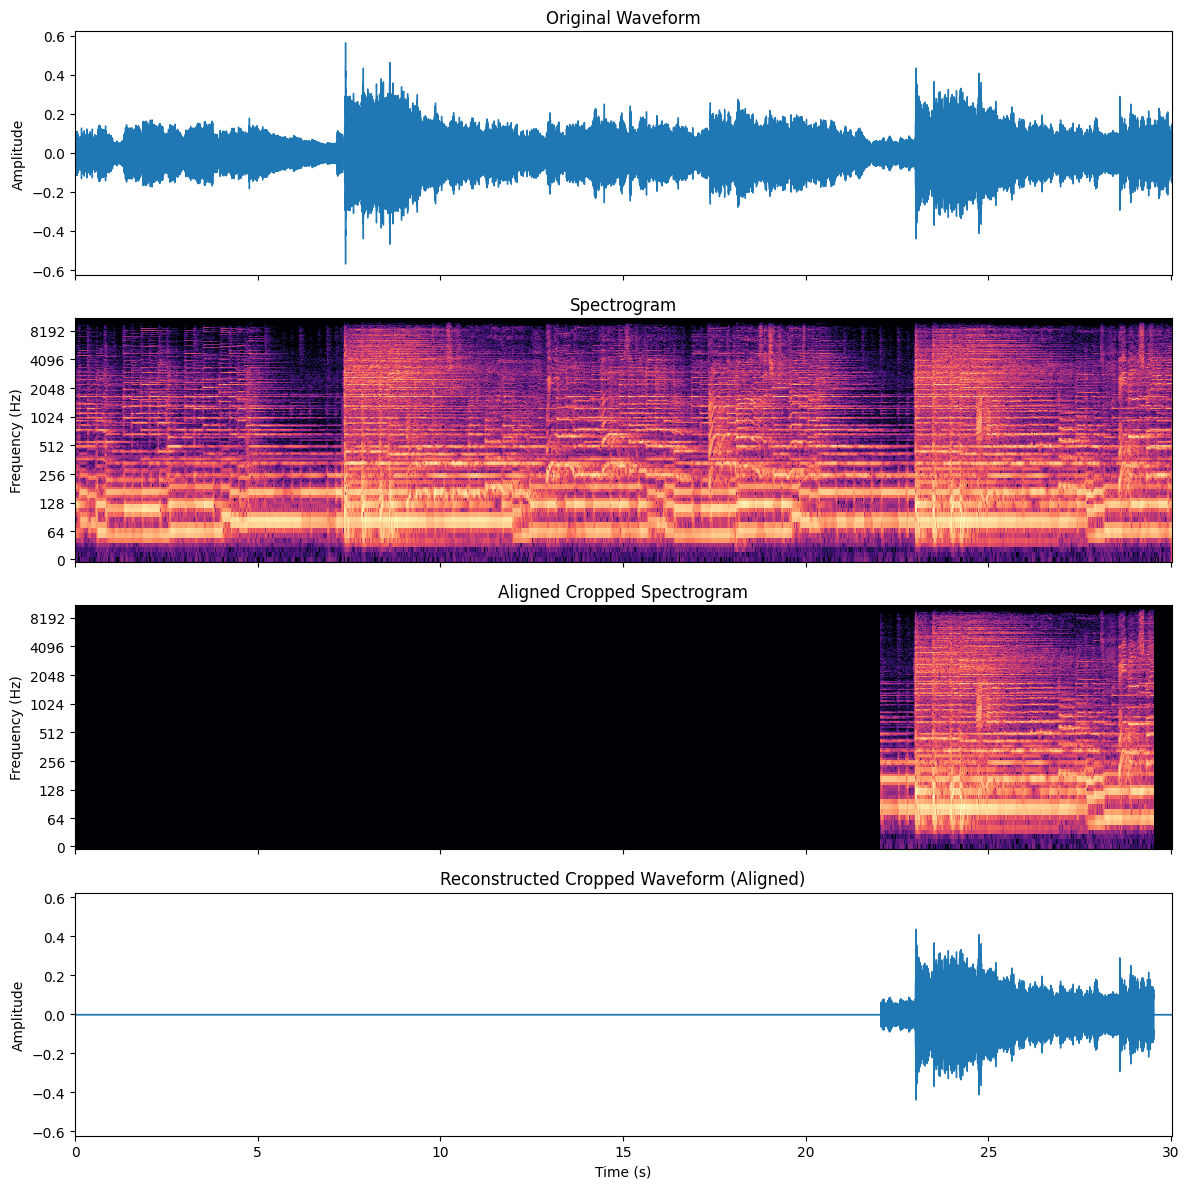

In [5]:
# Step 1: Load the audio file
# Upload your_audio_file.wav in the Colab environment before running this cell
y, sr = librosa.load('your_audio_file.wav')

# Step 2: Compute the STFT
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Step 3: Select a random segment from the spectrogram
time_frames = D.shape[1]
segment_duration = time_frames // 4  # Adjust this to change the segment size

# Ensure we have at least one segment worth of time frames
if time_frames <= segment_duration:
    start_frame = 0
else:
    start_frame = np.random.randint(0, time_frames - segment_duration)
end_frame = start_frame + segment_duration

# Crop the segment
D_cropped = D[:, start_frame:end_frame]
S_db_cropped = S_db[:, start_frame:end_frame]

# Step 4: Inverse STFT to reconstruct the cropped segment
y_cropped = librosa.istft(D_cropped)

# Calculate the corresponding time range for the cropped segment
start_sample = librosa.frames_to_samples(start_frame)
end_sample = start_sample + len(y_cropped)

# Create an array of zeros (silence) with the same length as the original audio
y_aligned = np.zeros_like(y)
y_aligned[start_sample:end_sample] = y_cropped

# Step 5: Save the reconstructed cropped audio
sf.write('reconstructed_cropped_audio.wav', y_cropped, sr)

# Step 6: Plot the original and reconstructed waveforms, and the spectrogram
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Plot the original waveform
librosa.display.waveshow(y, sr=sr, ax=axs[0])
axs[0].set_title('Original Waveform')
axs[0].set_ylabel('Amplitude')

# Plot the spectrogram
img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', ax=axs[1])
axs[1].set_title('Spectrogram')
axs[1].set_ylabel('Frequency (Hz)')

# Prepare the aligned cropped spectrogram for the full length
S_db_aligned = np.full_like(S_db, np.min(S_db))  # Fill with minimum dB value (silence)
S_db_aligned[:, start_frame:end_frame] = S_db_cropped

# Plot the aligned cropped spectrogram
img_cropped = librosa.display.specshow(S_db_aligned, sr=sr, x_axis='time', y_axis='log', ax=axs[2])
axs[2].set_title('Aligned Cropped Spectrogram')
axs[2].set_ylabel('Frequency (Hz)')

# Plot the aligned reconstructed cropped waveform
librosa.display.waveshow(y_aligned, sr=sr, ax=axs[3])
axs[3].set_title('Reconstructed Cropped Waveform (Aligned)')
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Amplitude')

# Set the y-axis limits to be the same for both waveforms
waveform_ylim = axs[0].get_ylim()
axs[3].set_ylim(waveform_ylim)

# Align ticks
for ax in axs:
    ax.label_outer()

plt.tight_layout()
plt.show()

In [6]:
# Step 7: Listen to the original and reconstructed audio
print("Original Audio:")
display(Audio(y, rate=sr))

print("Reconstructed Cropped Audio:")
display(Audio(y_aligned, rate=sr))


Original Audio:


Reconstructed Cropped Audio:
